In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the custom dataset and display the first 5 rows
data = pd.read_csv('/content/Iris.csv')
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
#data cleaning
data.drop('Id', axis=1, inplace=True)
data= data.dropna()

In [4]:
print(data.head())
print(data.info())
print(data.describe())
print("Shape of the data set : ",data.shape)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.0

In [5]:
# Extract features and target
X = data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = data["Species"]

In [6]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [9]:
# Create a RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [10]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 100.00%

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



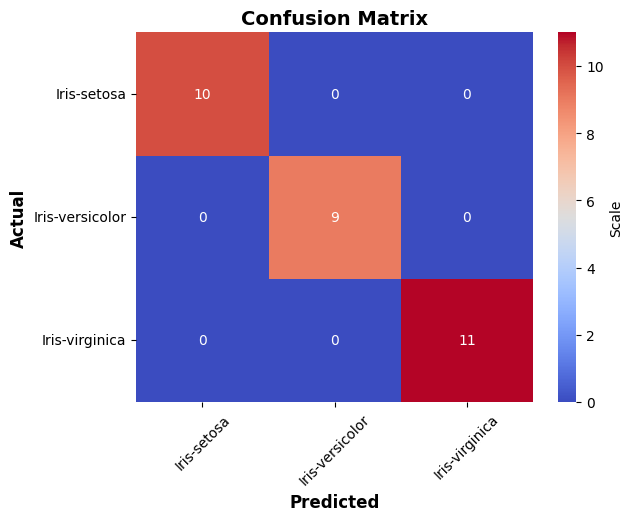

In [15]:
# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="coolwarm",  # Changed colormap to "coolwarm" for more vibrant colors
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
    cbar_kws={'label': 'Scale'}  # Added color bar label
)
plt.title("Confusion Matrix", fontsize=14, fontweight='bold')  # Enhanced title styling
plt.xlabel("Predicted", fontsize=12, fontweight='bold')  # Enhanced x-axis label styling
plt.ylabel("Actual", fontsize=12, fontweight='bold')  # Enhanced y-axis label styling
plt.xticks(fontsize=10, rotation=45)  # Adjusted x-tick labels for readability
plt.yticks(fontsize=10, rotation=0)  # Adjusted y-tick labels for readability
plt.show()


In [14]:

# Example prediction
sepal_length = float(input("Enter the sepal length: "))
sepal_width = float(input("Enter the sepal width: "))
petal_length = float(input("Enter the petal length: "))
petal_width = float(input("Enter the petal width: "))

testing_model = np.array([[sepal_length, sepal_width, petal_length, petal_width]])  # Example input: Sepal and petal measurements
predicted_class = model.predict(testing_model)
print(f"\nPredicted class for {testing_model}: {label_encoder.inverse_transform(predicted_class)[0]}")

Enter the sepal length: 4
Enter the sepal width: 2
Enter the petal length: 2
Enter the petal width: 2

Predicted class for [[4. 2. 2. 2.]]: Iris-setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
